In [70]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score,calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [16]:

# Carregando os dados
treino = pd.read_csv('data/train.csv')
teste = pd.read_csv('data/test.csv')
treino.drop(columns=['Survived'],inplace=True)
treino = pd.concat([treino,teste],axis=0)

In [17]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [18]:
treino.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [19]:
treino.fillna({'Age': treino['Age'].median(), 'Embarked': treino['Embarked'].mode()[0],'Fare':treino['Fare'].mean()}, inplace=True)

In [20]:
treino.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.837836,12.905241,1.041658,0.865560,51.738879
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [21]:
treino.Age.median()

28.0

In [22]:
colunas_para_remover = ['Name', 'Ticket', 'Cabin', 'Embarked','PassengerId']
treino.drop(colunas_para_remover, axis=1, inplace=True)

In [24]:
# Convertendo as variáveis categóricas (valide essa parte)
labelEncoder = LabelEncoder()
treino['Sex'] = labelEncoder.fit_transform(treino['Sex'])

In [25]:
# Normalizando os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(treino)

In [27]:
X

array([[1.        , 1.        , 0.27345609, 0.125     , 0.        ,
        0.01415106],
       [0.        , 0.        , 0.473882  , 0.125     , 0.        ,
        0.13913574],
       [1.        , 0.        , 0.32356257, 0.        , 0.        ,
        0.01546857],
       ...,
       [1.        , 1.        , 0.48014531, 0.        , 0.        ,
        0.01415106],
       [1.        , 1.        , 0.34861581, 0.        , 0.        ,
        0.01571255],
       [1.        , 1.        , 0.34861581, 0.125     , 0.11111111,
        0.0436405 ]])

In [28]:
treino.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

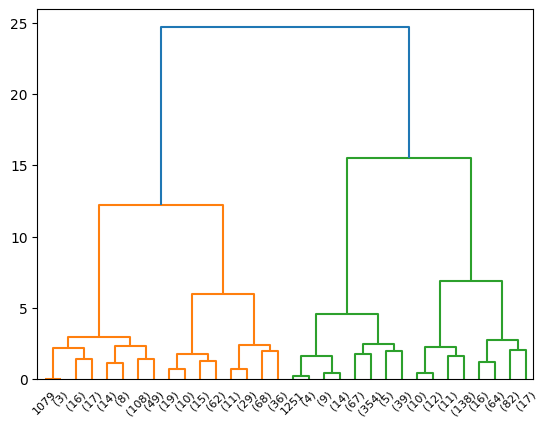

In [118]:
from scipy.cluster.hierarchy import dendrogram, linkage,ward

#linkage realiza clusterização hierárquica a fim de se construir um dendrograma
dendrogram(linkage(X,method='ward'),truncate_mode='level', p=4)
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(linkage='ward', metric="euclidean",distance_threshold=0,n_clusters=None)
clusters = hc_model.fit_predict(X)

treino['Cluster'] = clusters
treino.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cluster
0,3,1,22.0,1,0,7.2500,705
1,1,0,38.0,1,0,71.2833,1031
2,3,0,26.0,0,0,7.9250,998
3,1,0,35.0,1,0,53.1000,863
4,3,1,35.0,0,0,8.0500,1308


In [31]:
hc_model.get_params()

{'affinity': 'deprecated',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': 0,
 'linkage': 'ward',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': None}

In [40]:
hc_model.labels_

array([ 705, 1031,  998, ...,    2,    1,    0], dtype=int64)

In [33]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

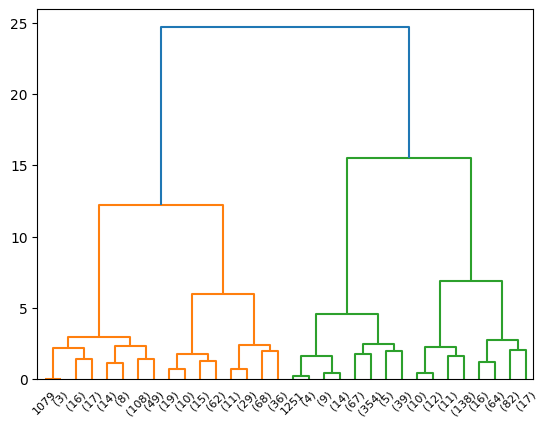

In [35]:
hc_model_fit = hc_model.fit(X)
plot_dendrogram(hc_model,truncate_mode="level",p=4)

In [36]:
pca = PCA(n_components=2)
X_pca =pca.fit_transform(X)


In [119]:
Z=linkage(X_pca,method='ward')
Z.shape

(1308, 4)

In [67]:
from scipy.cluster.hierarchy import fcluster

# Suponha que você queira formar 4 clusters
clusters = fcluster(Z, 4, criterion='maxclust')

# Calcule o índice de silhueta
silhouette_avg = silhouette_score(X, clusters)
print(f'Índice de Silhueta Médio: {silhouette_avg}')


Índice de Silhueta Médio: 0.588261585650972


In [68]:
pd.unique(clusters)

array([3, 2, 1, 4])

In [69]:
davies_bouldin = davies_bouldin_score(X, clusters)
print("Índice de Davies-Bouldin:", davies_bouldin)

Índice de Davies-Bouldin: 0.6735963169549717


In [71]:
calinski_harabasz_score(X, clusters)

1952.5431074115274

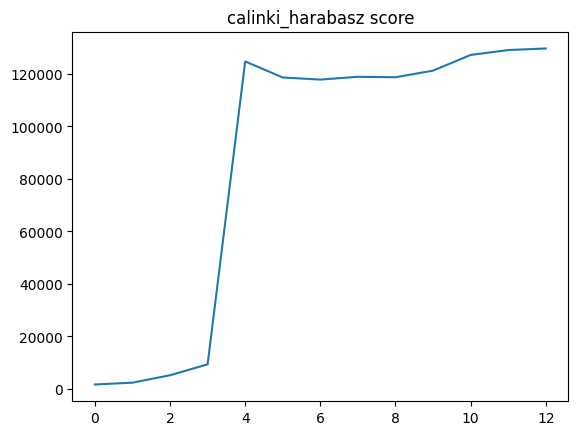

In [110]:
max_cluster = 15
cluster_calinski_series = []
for i in range(2,max_cluster):
    # Suponha que você queira formar 4 clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    CH_index = calinski_harabasz_score(X_pca, clusters)
    cluster_calinski_series.append(CH_index)
plt.plot(cluster_calinski_series)
plt.title("calinki_harabasz score")
plt.show()

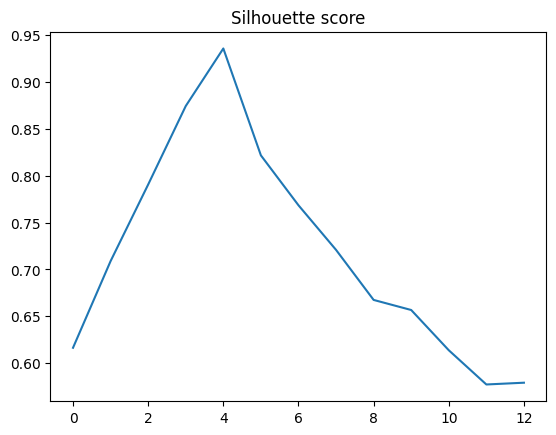

In [111]:
max_cluster = 15
cluster_silhouette_series = []
for i in range(2,max_cluster):
    # Suponha que você queira formar 4 clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    shi_score = silhouette_score(X_pca, clusters)
    cluster_silhouette_series.append(shi_score)
plt.plot(cluster_silhouette_series)
plt.title("Silhouette score")
plt.show()

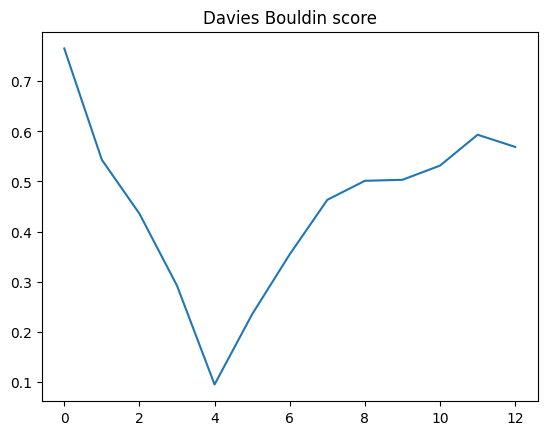

In [112]:
max_cluster = 15
cluster_davies_series = []
for i in range(2,max_cluster):
    # Suponha que você queira formar 4 clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    davies_score = davies_bouldin_score(X_pca, clusters)
    cluster_davies_series.append(davies_score)
plt.plot(cluster_davies_series)
plt.title("Davies Bouldin score")
plt.show()

In [113]:
clusters = fcluster(Z, 4, criterion='maxclust')

In [140]:
X_pca_df = pd.DataFrame(X_pca,columns=["componente 1","componente 2"])
X_pca_df["Cluster"] = clusters

In [143]:
cluster_1 = X_pca_df.loc[X_pca_df.Cluster==1]

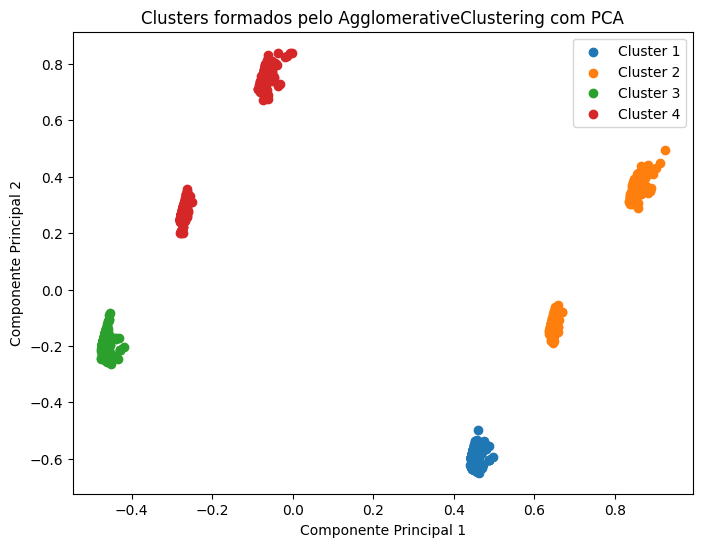

In [158]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(1,5):
    X_pca_cluster = X_pca_df.loc[X_pca_df.Cluster==i]
    ax.scatter(X_pca_cluster["componente 1"],X_pca_cluster["componente 2"],label=f"Cluster {i}")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters formados pelo AgglomerativeClustering com PCA')
ax.legend(loc="upper right")
plt.show()

In [120]:

# Aplique AgglomerativeClustering
agg_clust = AgglomerativeClustering(n_clusters=4)
agg_model = agg_clust.fit(X_pca)

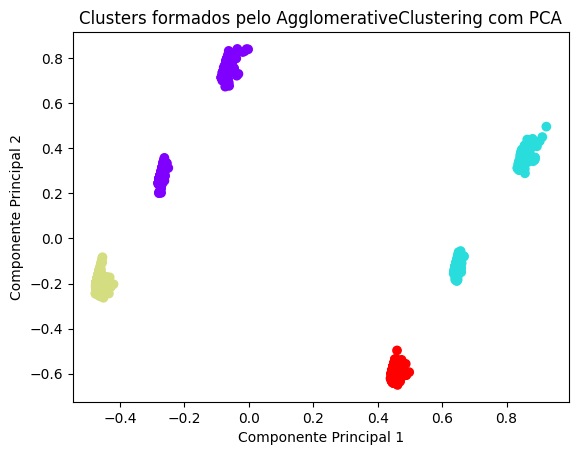

In [121]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_clust.labels_, cmap='rainbow')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters formados pelo AgglomerativeClustering com PCA')
plt.show()

In [179]:
pd.unique(agg_clust.labels_)

array([3, 2, 1, 0, 6, 5, 4], dtype=int64)

In [182]:
silhouette_avg = silhouette_score(X, agg_clust.labels_)
print(f'Índice de Silhueta Médio: {silhouette_avg}')

Índice de Silhueta Médio: 0.5957514124886524


In [184]:
davies_bouldin = davies_bouldin_score(X, agg_clust.labels_)
print("Índice de Davies-Bouldin:", davies_bouldin)

Índice de Davies-Bouldin: 0.7675846500335879


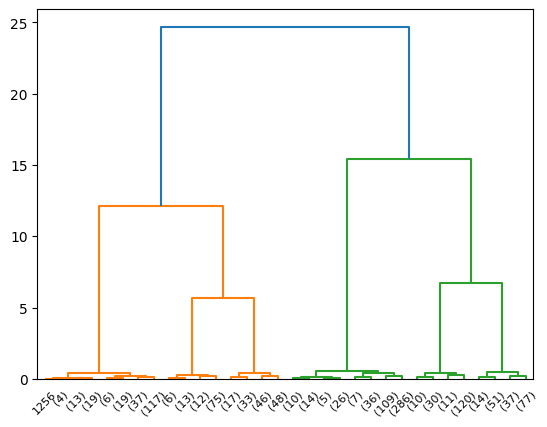

In [180]:
plot_dendrogram(agg_model,truncate_mode="level",p=4)

In [19]:
# Tratamento de valores faltantes
treino.fillna({'Age': treino['Age'].median(), 'Embarked': treino['Embarked'].mode()[0]}, inplace=True)
teste.fillna({'Age': teste['Age'].median(), 'Embarked': teste['Embarked'].mode()[0]}, inplace=True)

# Remoção de colunas não numéricas
colunas_para_remover = ['Name', 'Ticket', 'Cabin', 'Embarked','PassengerId']
treino.drop(colunas_para_remover, axis=1, inplace=True)
teste.drop(colunas_para_remover, axis=1, inplace=True)

# Convertendo as variáveis categóricas (valide essa parte)
labelEncoder = LabelEncoder()
treino['Sex'] = labelEncoder.fit_transform(treino['Sex'])
teste['Sex'] = labelEncoder.transform(teste['Sex'])

KeyError: 0

In [17]:

# Carregando os dados
#treino = pd.read_csv('data/train.csv')
#teste = pd.read_csv('data/test.csv')

print("***** Treino *****")
print(treino.head())
print("\n")

#print("***** Teste *****")
#print(teste.head())

print("\n")
print("\n")
print("***** Treino *****")
print(treino.describe())
print("\n")

#print("***** Teste *****")
#print(teste.describe())

print("\n")
print("***** Colunas de Treino *****")
print(treino.columns.values)
print("\n")
print("\n")
# Campos vazios na lista de treino retornam o valor True abaixo
treino.isna().head()

# # Campos vazios na lista de teste retornam o valor True abaixo
#teste.isna().head()

print("***** Quantidade de campos vazios no Treino *****")
print(treino.isna().sum())
print("\n")
print("***** Quantidade de campos vazios no Teste *****")
print(teste.isna().sum())

# Tratamento de valores faltantes
treino.fillna({'Age': treino['Age'].median(), 'Embarked': treino['Embarked'].mode()[0]}, inplace=True)
teste.fillna({'Age': teste['Age'].median(), 'Embarked': teste['Embarked'].mode()[0]}, inplace=True)

# Remoção de colunas não numéricas
colunas_para_remover = ['Name', 'Ticket', 'Cabin', 'Embarked','PassengerId']
treino.drop(colunas_para_remover, axis=1, inplace=True)
teste.drop(colunas_para_remover, axis=1, inplace=True)

# Convertendo as variáveis categóricas (valide essa parte)
labelEncoder = LabelEncoder()
treino['Sex'] = labelEncoder.fit_transform(treino['Sex'])
teste['Sex'] = labelEncoder.transform(teste['Sex'])

# Normalizando os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(treino, axis=1)


***** Treino *****
   PassengerId Pclass                                               Name  \
0            1      3                            Braund, Mr. Owen Harris   
1            2      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3      3                             Heikkinen, Miss. Laina   
3            4      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5      3                           Allen, Mr. William Henry   

      Sex   Age SibSp  Parch            Ticket     Fare Cabin  ... Pclass  \
0    male  22.0     1      0         A/5 21171   7.2500   NaN  ...    3.0   
1  female  38.0     1      0          PC 17599  71.2833   C85  ...    3.0   
2  female  26.0     0      0  STON/O2. 3101282   7.9250   NaN  ...    2.0   
3  female  35.0     1      0            113803  53.1000  C123  ...    3.0   
4    male  35.0     0      0            373450   8.0500   NaN  ...    3.0   

                                           Name     Sex   Age

KeyError: 0

In [ ]:

y = treino['Survived']

# AQUI é calculado a soma dos quadrados dentro dos clusters
inertia = []
K_range = range(1, 12)
for k in K_range:
    #kmeans = KMeans(n_clusters=k, max_iter=600, algorithm='auto')
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init="auto",random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

print("\n")
print("\n")
# Plotando o gráfico do cotovelo
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Gráfico do Cotovelo para o Dataset Titanic')
plt.show()

# Aplicando K-Means
#kmeans = KMeans(n_clusters=2, max_iter=600, algorithm='auto')
kmeans = KMeans(n_clusters=3, max_iter=1000, n_init="auto",verbose=1)
kmeans.fit(X)
clusters = kmeans.labels_
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotando o gráfico de dispersão dos clusters com os centroides
#plt.figure(figsize=(10, 8))
#sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='viridis', alpha=0.5)
#sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=300, color='blue', label='Centroids', marker='o')
#plt.title('K-Means++ Initialization')
#plt.legend()
#plt.show()


# Avaliando a correspondência entre os clusters e a sobrevivência
treino['Cluster'] = kmeans.labels_
correspondencia = pd.crosstab(treino['Survived'], treino['Cluster'])
print(correspondencia)

print("\n")
print("\n")
# Visualizações
# Distribuição de idade por cluster
sns.color_palette("Dark2")
sns.histplot(data=treino, x='Age', hue='Cluster', kde=True,palette="Dark2")
plt.title('Distribuição de Idade por Cluster')
plt.show()

# Distribuição de tarifa por sexo, colorida por cluster (AQUI ESTAVA COLOcando pra testar)
"""sns.scatterplot(data=treino, x='Fare', y='Sex', hue='Cluster')
plt.title('Tarifa por Sexo e Cluster')
plt.show()"""

# Relação entre Pclass e Sobrevivência
sns.barplot(x='Pclass', y='Survived', data=treino, capsize=.1)
plt.title('Relação entre Classe e Sobrevivência')
plt.show()

print("\n")
print("\n")
#####
#Obtendo os rótulos dos clusters
labels = kmeans.labels_

# Calculando o coeficiente de Silhueta
# [é analisado um coeficiente resultante de um cálculo da distância entre os centróides, levando em consideração o agrupamento dos dados que os cerca.]
silhouette = silhouette_score(X, labels)
print("Coeficiente de Silhueta:", silhouette)

# Calculando o silhouette scores para cada amostra
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# GErando o gráfico Silhueta
plt.figure(figsize=(6, 4))
y_lower = 10
for i in range(3): # Aqui podemos ir substituindo pelo número de clusters se for diferente, daí agregando as amostras pertencentes ao mesmo cluster

    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 4) # Mesma coisa aqui, podemos ir substituindo pelo número de clusters se for diferente
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Criando rótulo para o gráfico silhouette com o número do cluster no meio
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 para as amostras do próximo cluster

plt.title("O gráfico silhouette para os clusters")
plt.xlabel("Valores do Coefiente silhouette")
plt.ylabel("Rótulo do Cluster")

# Traça uma vertical para a média do silhouette score de todos os valores
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Limpar os yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


print("\n")
# Calculando o índice de Davies-Bouldin
#[é uma métrica para avaliar algoritmos de agrupamento. Esta é uma abordagem de avaliação interna,
# onde a validação de quão bem o agrupamento foi feito é realizada usando quantidades e características inerentes ao conjunto de dados]
davies_bouldin = davies_bouldin_score(X, labels)
print("Índice de Davies-Bouldin:", davies_bouldin)

# Uma observação que li: diferentemente do gráfico de silhueta, o índice de Davies-Bouldin não é comumente representado como um gráfico para cada amostra,
# pois é uma métrica globalizada do modelo de clustering, e não para pontos de dados individuais.

# É necessário ter uma lista de modelos KMeans com diferentes números de clusters já treinados
db_scores = []
K_range = range(2, 12)  # Deve começar com 2 clusters, pois 1 cluster terá um índice DB de 0 por definição.

for k in K_range:
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init='auto', random_state=42).fit(X)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(X, labels)
    db_scores.append(db_score)

# Plotando o índice de Davies-Bouldin para diferentes números de clusters
plt.figure(figsize=(6, 4))
plt.plot(K_range, db_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Davies-Bouldin')
plt.title('Índice de Davies-Bouldin por Número de Clusters')
plt.show()

#veja que se assimila como no gráfico do cotovelo, lembro que não há garantia de que haverá um ponto de inflexão claro e que a interpretação fica por NOSSA conta / do usuário.

treino.loc[treino.Cluster==2].describe()

print("\n")
labelEncoder.inverse_transform([0])

treino.describe()

print("\n")
sns.barplot(x='Cluster', y='Pclass',hue="Sex", data=treino)

print("\n")
sns.barplot(x='Cluster', y='Survived',hue="Pclass", data=treino)

print("\n")
# Análise Descritiva de um Cluster Específico
#print("\nAnálise Descritiva do Cluster 3:")
#print(treino.loc[treino.Cluster==3].describe())

# Reverter os Rótulos de Gênero para Interpretação
print("\nRótulos de Gênero Revertidos:")
print(labelEncoder.inverse_transform([0, 1]))

# Gráficos de Barras Adicionais
"""print("\nRelação entre Cluster, Classe e Gênero:")
sns.barplot(x='Cluster', y='Pclass', hue='Sex', data=treino)
plt.show()"""

print("\nRelação entre Cluster e Sobrevivência por Classe:")
sns.barplot(x='Pclass', y='Survived', hue='Cluster', data=treino)
plt.show()

print("\n")

print("\n")

In [ ]:
teste.info()

In [ ]:
for i in range(3):
  print(f"+++++ Cluster {i} ++++++")
  print(treino.loc[treino.Cluster==i].describe())

In [ ]:
# Realizando PCA e KMeans como já foi feito
pca_titanic = PCA(n_components=2)
data_pca_titanic = pca_titanic.fit_transform(treino)
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(data_pca_titanic)
labels_pca = kmeans_pca.fit_predict(data_pca_titanic)

# Cores para os clusters
palette = sns.color_palette("Dark2", len(np.unique(labels_pca)))

# Plotando os dados com cores
for label, color in zip(np.unique(labels_pca), palette):
    plt.scatter(data_pca_titanic[labels_pca == label, 0],
                data_pca_titanic[labels_pca == label, 1],
                label=f'Cluster {label}',
                c=[color])

# Adicionando os centroides dos clusters
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, linewidths=2,
            c='black', zorder=10,
            label='Centroids')

# Adicionando os títulos dos eixos e título do gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados do Titanic com K-Means Clustering')

# Mostrando a legenda
plt.legend()

plt.show()